In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib

In [2]:
matplotlib.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False 

In [3]:
bt_df = pd.read_csv('BCHAIN-MKPRU.csv')
gold_df = pd.read_csv('LBMA-GOLD.csv')

In [4]:
bt_df.head()

,Date,Value
0,9/11/16,621.65
1,9/12/16,609.67
2,9/13/16,610.92
3,9/14/16,608.82
4,9/15/16,610.38


In [5]:
gold_df.head()

,Date,USD (PM)
0,9/12/16,1324.60
1,9/13/16,1323.65
2,9/14/16,1321.75
3,9/15/16,1310.80
4,9/16/16,1308.35


In [6]:
gold_df['Date']=gold_df['Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%y'))
bt_df['Date']=bt_df['Date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%y'))
gold_df.head()
gold_df.to_excel('golddate.xlsx')
bt_df.to_excel('btcoindate.xlsx')

In [7]:
bt_df.head()

,Date,Value
0,2016-09-11,621.65
1,2016-09-12,609.67
2,2016-09-13,610.92
3,2016-09-14,608.82
4,2016-09-15,610.38


In [8]:
df = gold_df.merge(bt_df, on='Date',how='outer')
df=df.sort_values(by='Date')
df.index=[i for i in range(df.shape[0])]
df['DealDay']=df['USD (PM)'].apply(lambda x:int(not np.isnan(x)))
df=df.fillna(method='ffill')
df.to_excel('gold-btcoin-goldtradedate.xlsx')
df.head()

,Date,USD (PM),Value,DealDay
0,2016-09-11,NaN,621.65,0
1,2016-09-12,1324.60,609.67,1
2,2016-09-13,1323.65,610.92,1
3,2016-09-14,1321.75,608.82,1
4,2016-09-15,1310.80,610.38,1


In [9]:
df['goldrise']=0
df['btcoinrise']=0
for i in df.index[1:]:
    df['goldrise'][i]=df['USD (PM)'][i]-df['USD (PM)'][i-1]
    df['btcoinrise'][i]=df['Value'][i]-df['Value'][i-1]

C:\WINDOWS\TEMP/ipykernel_20308/771047138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['goldrise'][i]=df['USD (PM)'][i]-df['USD (PM)'][i-1]
D:\Anaconda\Real\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\WINDOWS\TEMP/ipykernel_20308/771047138.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['btcoinrise'][i]=df['Value'][i]-

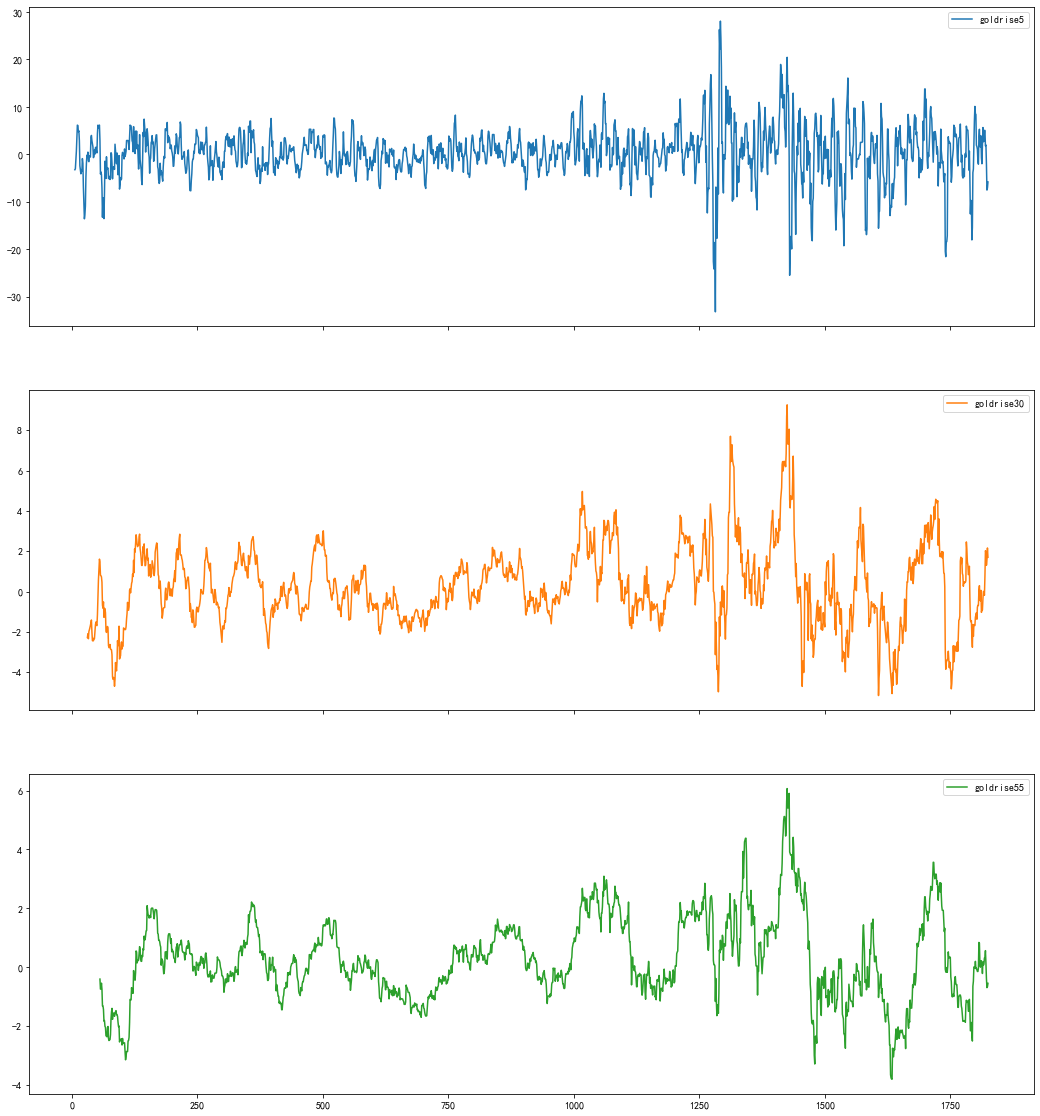

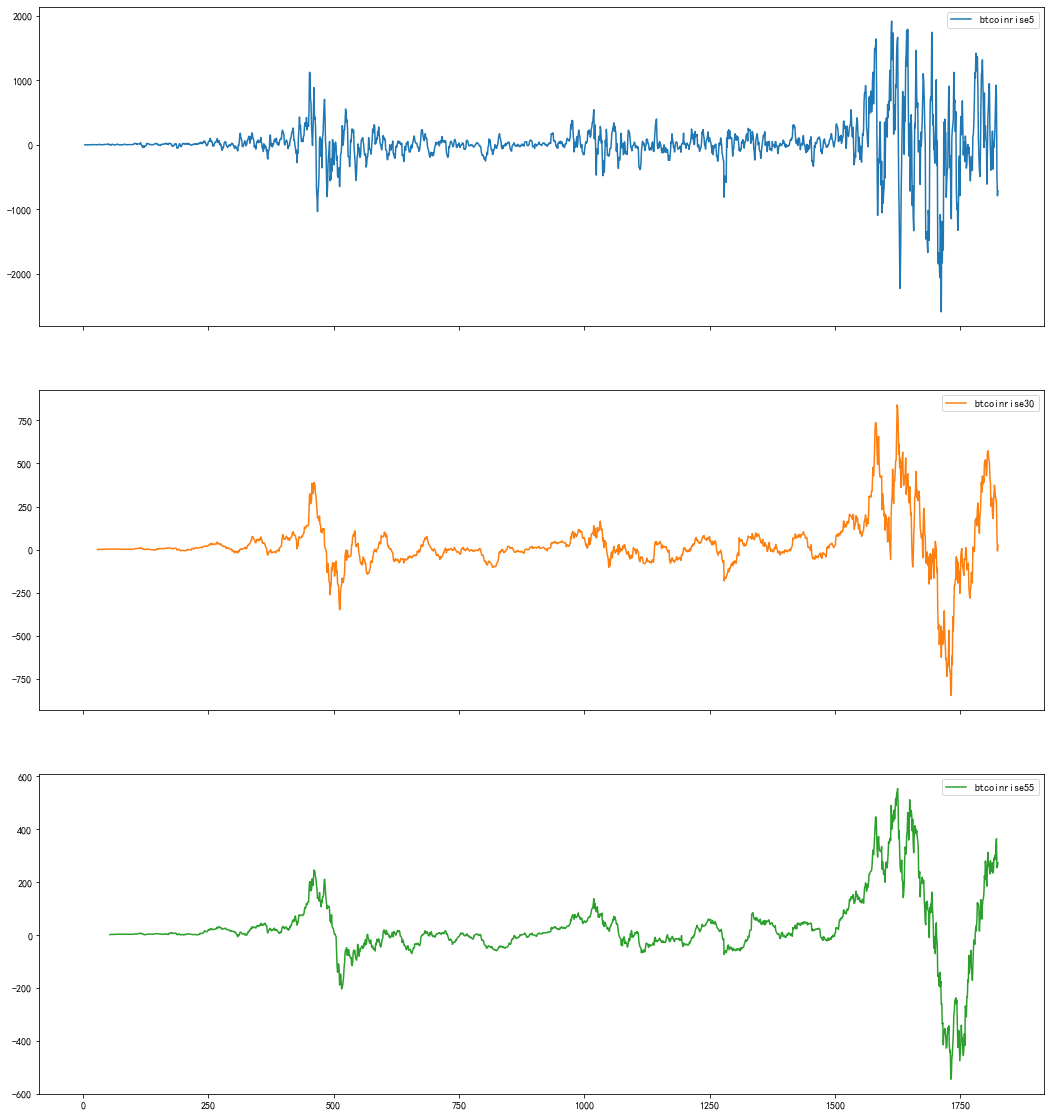

In [10]:
df_info = pd.DataFrame()
for i in range(5,56,25):
    df_info['goldrise'+str(i)]=df['goldrise'].rolling(i).mean()
    df_info['btcoinrise'+str(i)]=df['btcoinrise'].rolling(i).mean()
df_info[['goldrise'+str(i) for i in range(5,56,25)]].plot(subplots=True, figsize=(18,20))
plt.savefig('goldrise.png')
plt.show()
df_info[['btcoinrise'+str(i) for i in range(5,56,25)]].plot(subplots=True, figsize=(18,20))
plt.savefig('btcoinrise.png')
plt.show()

In [11]:
df['30days average price of gold']=df['USD (PM)'].rolling(30).mean()
df['30days BIAS of gold']=100*(df['USD (PM)']-df['30days average price of gold'])/df['30days average price of gold']
df['5days average price of btcoin']=df['Value'].rolling(5).mean()
df['5days BIAS of btcoin']=100*(df['Value']-df['5days average price of btcoin'])/df['5days average price of btcoin']

In [12]:
df.to_excel('BIAS-average price.xlsx')

In [13]:
df.head(20)

,Date,USD (PM),Value,DealDay,goldrise,btcoinrise,30days average price of gold,30days BIAS of gold,5days average price of btcoin,5days BIAS of btcoin
0,2016-09-11,NaN,621.65,0,0.00,0,NaN,NaN,NaN,NaN
1,2016-09-12,1324.60,609.67,1,NaN,-11,NaN,NaN,NaN,NaN
2,2016-09-13,1323.65,610.92,1,-0.95,1,NaN,NaN,NaN,NaN
3,2016-09-14,1321.75,608.82,1,-1.90,-2,NaN,NaN,NaN,NaN
4,2016-09-15,1310.80,610.38,1,-10.95,1,NaN,NaN,612.288,-0.311618
5,2016-09-16,1308.35,609.11,1,-2.45,-1,NaN,NaN,609.780,-0.109876
6,2016-09-17,1308.35,607.04,0,0.00,-2,NaN,NaN,609.254,-0.363395
7,2016-09-18,1308.35,611.58,0,0.00,4,NaN,NaN,609.386,0.360035
8,2016-09-19,1314.85,610.19,1,6.50,-1,NaN,NaN,609.660,0.086934
9,2016-09-20,1313.80,608.66,1,-1.05,-1,NaN,NaN,609.316,-0.107662


In [14]:
df.columns

Index(['Date', 'USD (PM)', 'Value', 'DealDay', 'goldrise', 'btcoinrise',
       '30days average price of gold', '30days BIAS of gold',
       '5days average price of btcoin', '5days BIAS of btcoin'],
      dtype='object')

In [15]:
df.head()

,Date,USD (PM),Value,DealDay,goldrise,btcoinrise,30days average price of gold,30days BIAS of gold,5days average price of btcoin,5days BIAS of btcoin
0,2016-09-11,NaN,621.65,0,0.00,0,NaN,NaN,NaN,NaN
1,2016-09-12,1324.60,609.67,1,NaN,-11,NaN,NaN,NaN,NaN
2,2016-09-13,1323.65,610.92,1,-0.95,1,NaN,NaN,NaN,NaN
3,2016-09-14,1321.75,608.82,1,-1.90,-2,NaN,NaN,NaN,NaN
4,2016-09-15,1310.80,610.38,1,-10.95,1,NaN,NaN,612.288,-0.311618


对已经计算出的指标进行归一化    
归一化=（当前值-最小值）/（最大值-最小值）

In [16]:
df=df.fillna(0)
for column in df.columns[3:10]:
    max_,min_=df[column].max(),df[column].min()
    df[column]=df[column].apply(lambda x:(x-min_)/(max_-min_))#归一化=（当前值-最小值）/（最大值-最小值)
df.to_excel('归一化.xlsx')
df.head()

,Date,USD (PM),Value,DealDay,goldrise,btcoinrise,30days average price of gold,30days BIAS of gold,5days average price of btcoin,5days BIAS of btcoin
0,2016-09-11,0.00,621.65,0.0,0.566145,0.510080,0.0,0.469013,0.000000,0.550392
1,2016-09-12,1324.60,609.67,1.0,0.566145,0.509356,0.0,0.469013,0.000000,0.550392
2,2016-09-13,1323.65,610.92,1.0,0.561015,0.510146,0.0,0.469013,0.000000,0.550392
3,2016-09-14,1321.75,608.82,1.0,0.555886,0.509949,0.0,0.469013,0.000000,0.550392
4,2016-09-15,1310.80,610.38,1.0,0.507019,0.510146,0.0,0.469013,0.009834,0.545356


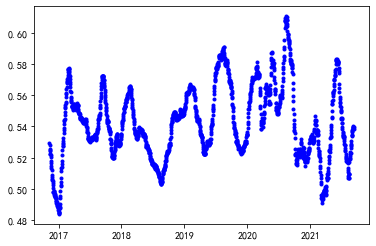

In [17]:
df['goldbull']=df['goldrise'].rolling(60).mean()*0.7+0.3*df['30days BIAS of gold'].rolling(60).mean()
plt.scatter(df['Date'],df['goldbull'],c='b',marker='.')
plt.savefig('goldbull.png')
plt.show()

In [18]:
gold_bull = []
gold_bear = []
for i in range(15,df.shape[0]):
    if df['goldbull'][i]>0.54 :
        gold_bull.append(i)
    if df['goldbull'][i]<=0.54:
        gold_bear.append(i)

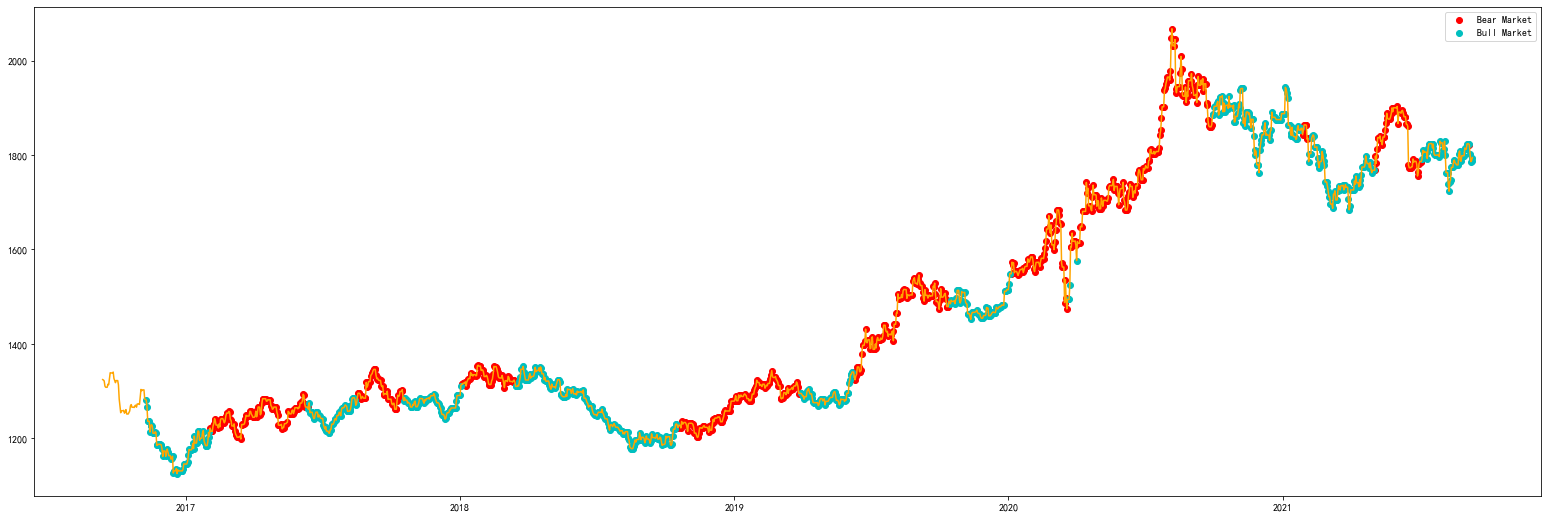

In [19]:
plt.figure(figsize=[27,9])
plt.plot(df['Date'][1:],df['USD (PM)'][1:],'orange')
plt.scatter(df['Date'][gold_bull].values,df['USD (PM)'][gold_bull],c='r',marker='o',label='Bear Market')
plt.scatter(df['Date'][gold_bear].values,df['USD (PM)'][gold_bear],c='c',marker='o',label='Bull Market')
plt.legend()
plt.savefig('goldbull-bear.png')
plt.show()

In [20]:
df['gold_bull']=0
for i in gold_bull:
    if i<90:
        continue
    for j in range(i-90,i):
        df['gold_bull'][j]+=1
for i in gold_bear:
    if i<90:
        continue
    for j in range(i-90,i):
        df['gold_bull'][j]-=1

C:\WINDOWS\TEMP/ipykernel_20308/3748860192.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gold_bull'][j]+=1
C:\WINDOWS\TEMP/ipykernel_20308/3748860192.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gold_bull'][j]-=1


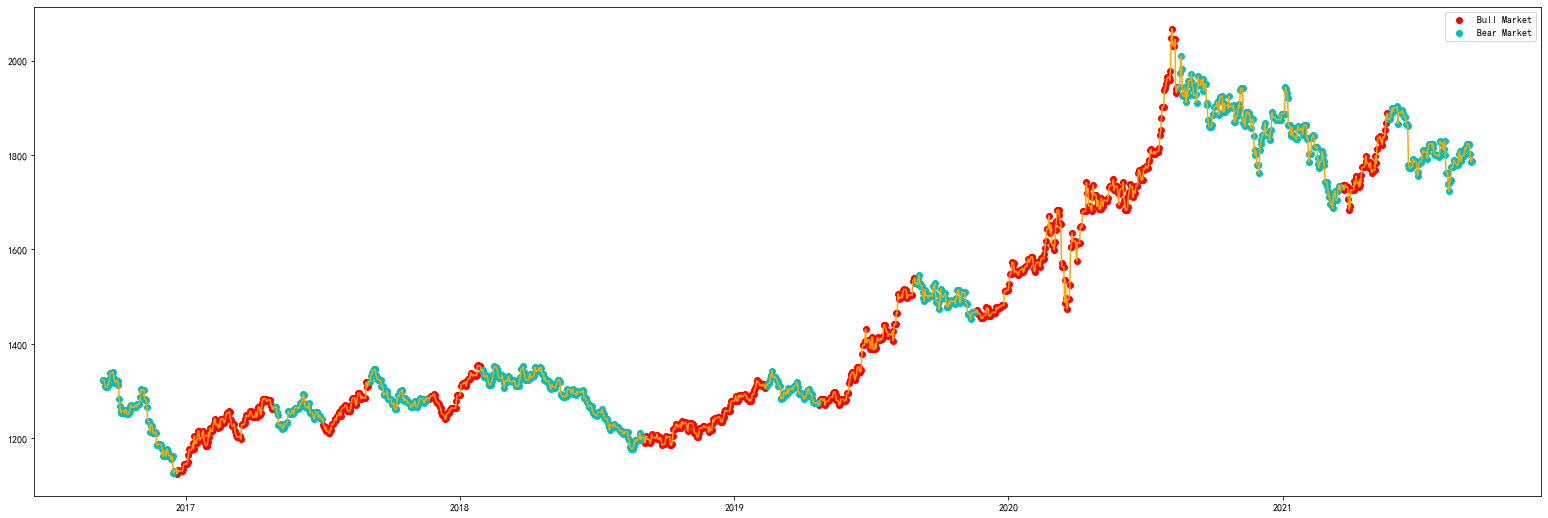

In [25]:
plt.figure(figsize=[27,9])
plt.plot(df['Date'][1:],df['USD (PM)'][1:],'orange')  # 第一天不是黄金交易日，从第二天开始
plt.scatter(df['Date'][df['gold_bull']>0][1:],df['USD (PM)'][df['gold_bull']>0][1:],c='r',marker='o',label='Bull Market')
plt.scatter(df['Date'][df['gold_bull']<0][1:],df['USD (PM)'][df['gold_bull']<0][1:],c='c',marker='o',label='Bear Market')
plt.legend()
plt.savefig('GoldBB2.png')
plt.show()

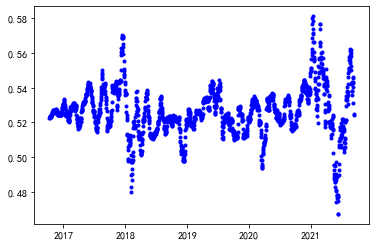

In [22]:
df['btcoinbull']=df['btcoinrise'].rolling(30).mean()*0.7+0.3*df['5days BIAS of btcoin'].rolling(30).mean()
plt.scatter(df['Date'],df['btcoinbull'],c='b',marker='.')
plt.savefig('btcoincull.png')
plt.show()

In [23]:
bt_bull = []
bt_bear = []
for i in range(15,df.shape[0]):
    if df['btcoinbull'][i]>0.52:
        bt_bull.append(i)
    if df['btcoinbull'][i]<=0.52:
        bt_bear.append(i)

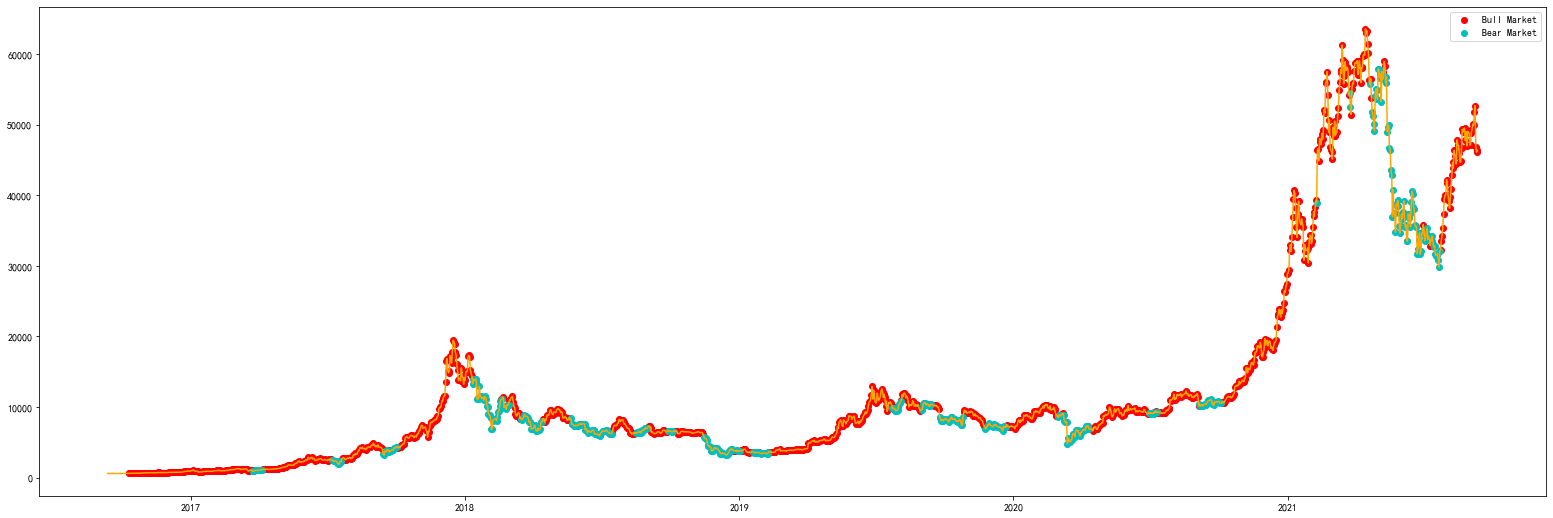

In [24]:
plt.figure(figsize=[27,9])
plt.plot(df['Date'][1:],df['Value'][1:],'orange')
plt.scatter(df['Date'][bt_bull].values,df['Value'][bt_bull],c='r',marker='o',label='Bull Market')
plt.scatter(df['Date'][bt_bear].values,df['Value'][bt_bear],c='c',marker='o',label='Bear Market')
plt.legend()
plt.savefig('btcoinBB.png')
plt.show()